### Mode Evaluator Example 

In [89]:
from models.regex import RegexModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface, ModelReport, ReportsComparison

# Load the regex model and the dataloader 
regex_m = RegexModel()
dataloader = AnnotationDataLoader()

regex_m.model_title = "Regex"
regex_m.model_info = "a"

# warp it model evaluator
## Evaluate model
# regex_m_wrapper = ModelEvalWrapper(regex_m, "Regex", "The baseline regex classifer")

In [2]:
regex_m_wrapper.predict(["asd", "asdadad"])

[2, 2]

In [3]:
import pandas as pd
t1 = dataloader.get_train()
t2 = dataloader.get_validation()
t3 = dataloader.get_test()

all = pd.concat([t1, t2, t3])

In [4]:
all

,protein_annotation,label
0,"Activator 1 36 kDa, putative",0
1,ARAD1C36740p,0
2,Abasic site processing protein YMR114C,2
3,Amino acid dehydrogenase,2
4,"Transcription regulator HTH, LysR",2
...,...,...
495,Anaerobic ribonucleoside-triphosphate reductas...,2
496,Beta-aspartyl asparaginyl family,2
497,Murein hydrolase activator NlpD,2
498,Outer membrane lipoprotein pcp,2



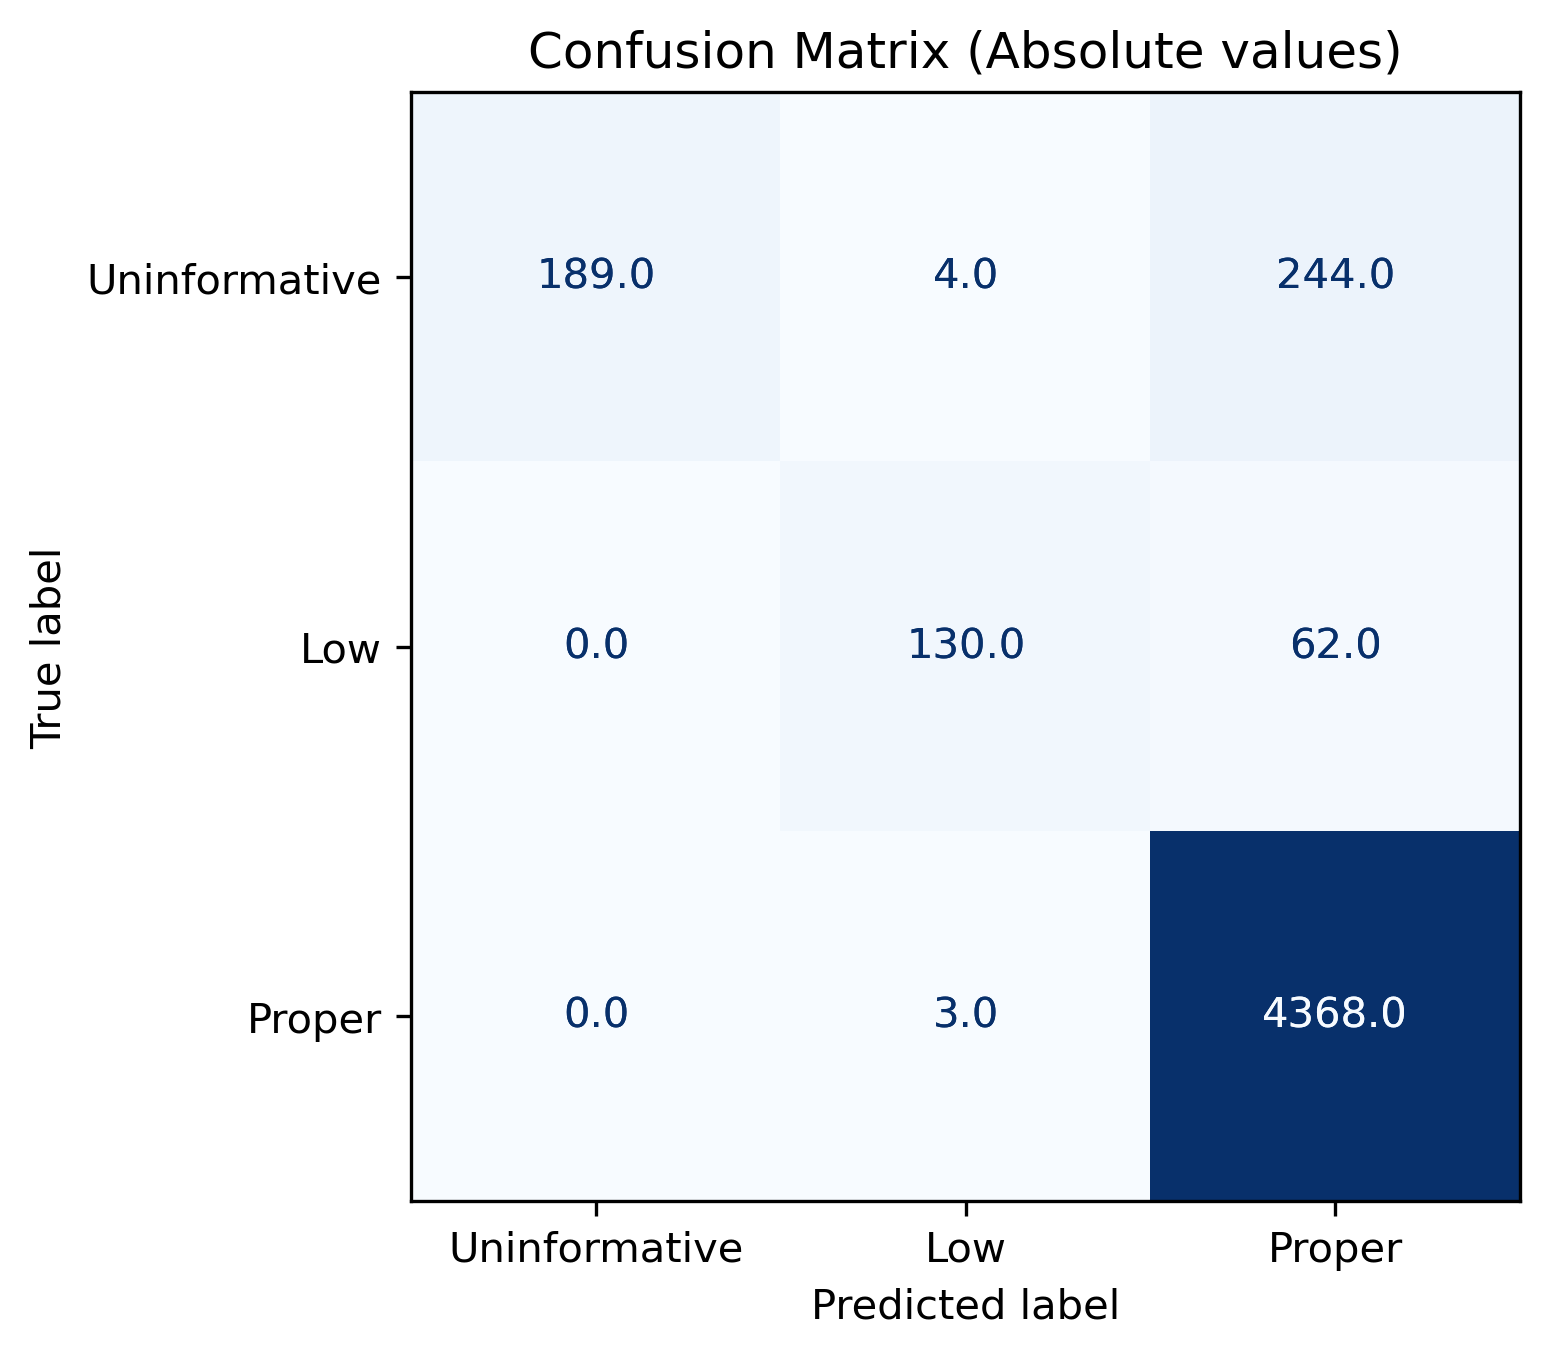
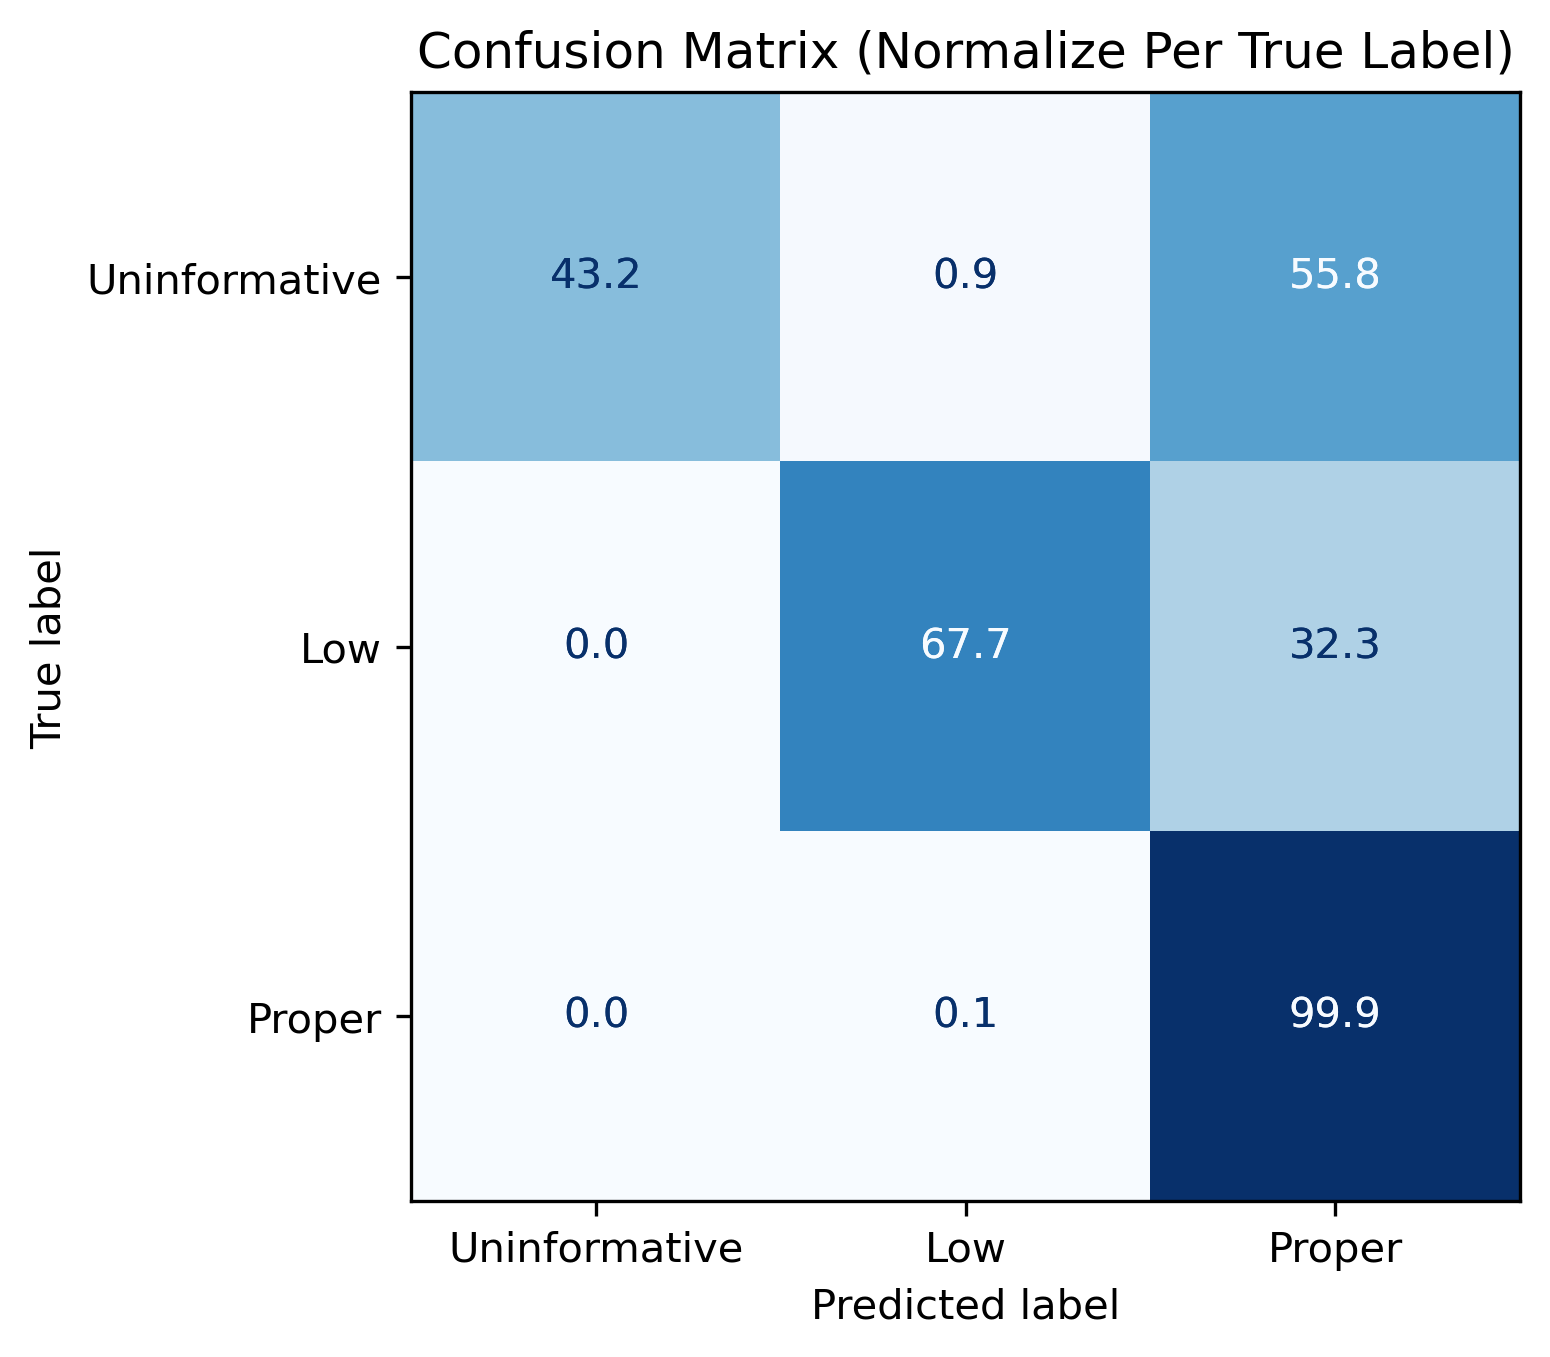

In [ ]:
# regex model requrie no traning, so we can just predict on the eval set
# evaluator = ModelEvaluator(regex_m_wrapper, dataloader.get_train())
evaluator = ModelEvaluator(regex_m, all)

regex_report = evaluator.generate_report()
regex_report.show_report()

,protein_annotation,true_label,predicted_label
0,"Activator 1 36 kDa, putative",0,2
1,ARAD1C36740p,0,2
9,GD15429,0,2
12,"Uncharacterized conserved protein UCP015417, vWA",0,2
19,Poly,0,2
...,...,...,...
414,Phage-related J or K,0,2
435,BQ5605_C018g08736 protein,0,2
436,Uncharacterized gene 7.7 protein (Modular prot...,0,2
465,Leucine rich repeat 5,1,2


In [7]:
# # Save report to disk
# regex_report.save_to_file("report_regex.rep")

regex_report.eval_df != regex_report.eval_df 

,protein_annotation,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
495,False,False
496,False,False
497,False,False
498,False,False


In [2]:
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface, ModelReport, ReportsComparison

reg_report = ModelReport.load_report("report_regex.rep")
emb_report = ModelReport.load_report("embbeder_report.rep")
report_compare = ReportsComparison([reg_report, emb_report])


In [7]:
report_compare.get_comparison_df()

,Model,Accuracy,Average Time Per Prediction,Macro Average (precision),Macro Average (recall),Macro Average (f1-score),Macro Average (support),Weighted Average (precision),Weighted Average (recall),Weighted Average (f1-score),Weighted Average (support)
0,Regex,0.934857,0.000088,0.955693,0.687460,0.772890,3500.0,0.938311,0.934857,0.924245,3500.0
1,embedder,0.967000,0.007088,0.954138,0.870685,0.908821,1000.0,0.965998,0.967000,0.965683,1000.0


In [ ]:
reg_report = ModelReport.load_report("report_regex.rep")
emb_report = ModelReport.load_report("embbeder_report.rep")

report_compare.show_comparison_table()

In [10]:
report_compare.show_comparison_plot()

In [5]:
report_compare.show_comparison()

[2025-10-26 14:19:02,006] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\Elon\anaconda3\envs\main\Lib\site-packages\dash\dash.py", line 1388, in _prepare_callback
    cb = self.callback_map[output]
         ~~~~~~~~~~~~~~~~~^^^^^^^^
KeyError: '..model-metrics-table.columns...model-metrics-table.style_header_conditional..'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\Elon\anaconda3\envs\main\Lib\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Elon\anaconda3\envs\main\Lib\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Elon\anaconda3\envs\main\Lib\site-packages\flask\app.py", line 917, in full_dispatch_request
    rv = self.dispatch_

In [ ]:
# from models.pretrained_embedder.embedder_classifier import EmbedderClassifier
# from data_loader import AnnotationDataLoader
# from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface

# embedder_m = EmbedderClassifier()
# dataloader = AnnotationDataLoader()

# embedder_m.train(dataloader.get_train())

# eval_wrapper =  ModelEvalWrapper(embedder_m, "embedder")
# m = ModelEvaluator(eval_wrapper, dataloader.get_validation())
# c_report = m.generate_report()
# c_report.show_report()



In [ ]:
# c_report.save_to_file("embbeder_report")